In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import catboost as cb
from sklearn.preprocessing import StandardScaler, OneHotEncoder

Считываем данные и обрабатываем их

In [30]:
data_train = pd.read_csv('./train.csv')

In [31]:
data_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [32]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [33]:
data_train.isna().mean()

ClientPeriod                0.0
MonthlySpending             0.0
TotalSpent                  0.0
Sex                         0.0
IsSeniorCitizen             0.0
HasPartner                  0.0
HasChild                    0.0
HasPhoneService             0.0
HasMultiplePhoneNumbers     0.0
HasInternetService          0.0
HasOnlineSecurityService    0.0
HasOnlineBackup             0.0
HasDeviceProtection         0.0
HasTechSupportAccess        0.0
HasOnlineTV                 0.0
HasMovieSubscription        0.0
HasContractPhone            0.0
IsBillingPaperless          0.0
PaymentMethod               0.0
Churn                       0.0
dtype: float64

In [34]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

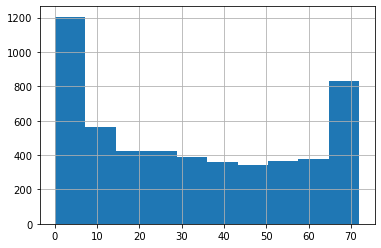

In [35]:
data_train['ClientPeriod'].hist();

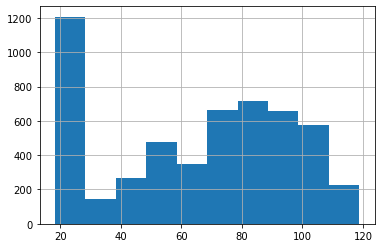

In [36]:
data_train['MonthlySpending'].hist();

В колонке TotalSpent есть пробелы, обнуляем их (поскольку они появляються только
у пользователей, которые пользуются сервисом 0 месяцев, то есть еще не успели заплатить)

In [37]:
data_train[data_train['TotalSpent'] == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


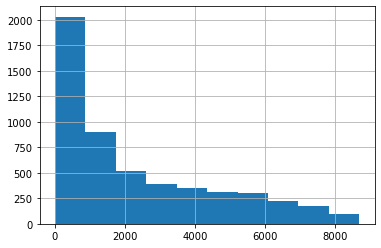

In [38]:
data_train = data_train.replace(' ', 0)
data_train['TotalSpent'] = data_train['TotalSpent'].astype(float)
data_train['TotalSpent'].hist();

Male      2655
Female    2627
Name: Sex, dtype: int64


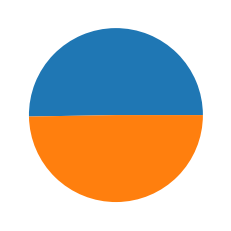

0    4440
1     842
Name: IsSeniorCitizen, dtype: int64


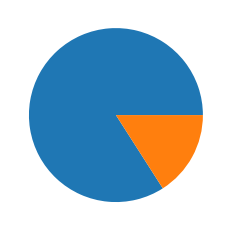

No     2705
Yes    2577
Name: HasPartner, dtype: int64


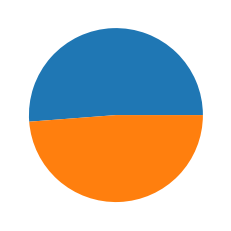

No     3676
Yes    1606
Name: HasChild, dtype: int64


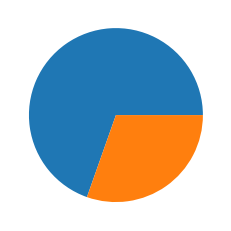

Yes    4761
No      521
Name: HasPhoneService, dtype: int64


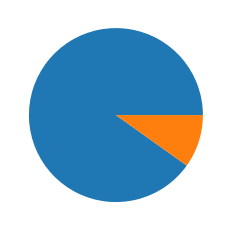

No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64


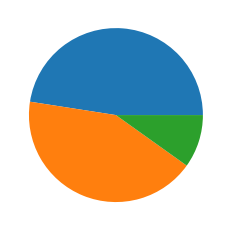

Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64


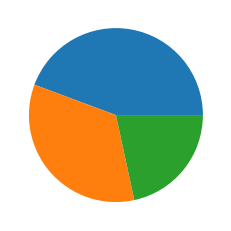

No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64


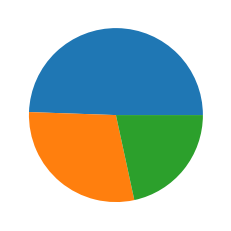

No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64


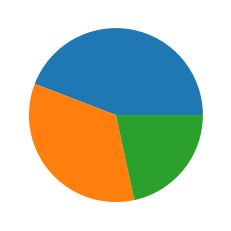

No                     2317
Yes                    1824
No internet service    1141
Name: HasDeviceProtection, dtype: int64


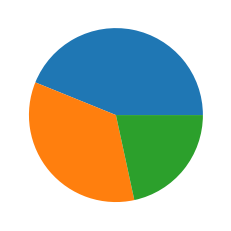

No                     2604
Yes                    1537
No internet service    1141
Name: HasTechSupportAccess, dtype: int64


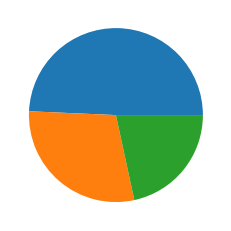

No                     2099
Yes                    2042
No internet service    1141
Name: HasOnlineTV, dtype: int64


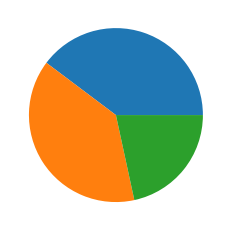

No                     2081
Yes                    2060
No internet service    1141
Name: HasMovieSubscription, dtype: int64


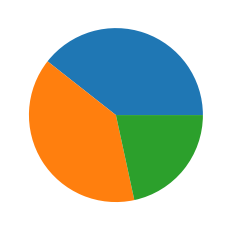

Month-to-month    2920
Two year          1280
One year          1082
Name: HasContractPhone, dtype: int64


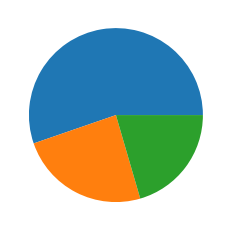

Yes    3148
No     2134
Name: IsBillingPaperless, dtype: int64


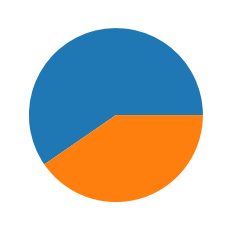

Electronic check             1786
Mailed check                 1194
Bank transfer (automatic)    1159
Credit card (automatic)      1143
Name: PaymentMethod, dtype: int64


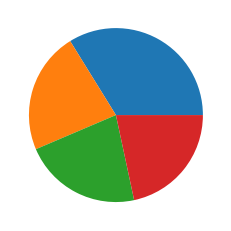

In [39]:
for i in cat_cols:
    print(data_train[i].value_counts())
    plt.pie(data_train[i].value_counts())
    plt.show()

In [40]:
data_train[target_col].value_counts() #классы сбалансированые

0    3898
1    1384
Name: Churn, dtype: int64

Делаем one hot encoding для категориальных переменных

In [41]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(data_train[cat_cols]).toarray())

In [42]:
enc_df = enc_df.rename(columns = {i : f'new_col_{i + 1}' for i in range(43)})

In [43]:
data_train = data_train.drop(columns = cat_cols)
data_train = data_train.join(enc_df)

Теперь делаем такие же преобразования для тестовой части данных

In [44]:
data_test = pd.read_csv('./test.csv')

In [45]:
data_test.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [46]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [47]:
data_test = data_test.replace(' ', 0)
data_test['TotalSpent'] = data_test['TotalSpent'].astype(float)

In [48]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(data_test[cat_cols]).toarray())

In [49]:
enc_df = enc_df.rename(columns = {i : f'new_col_{i + 1}' for i in range(43)})

In [50]:
data_test = data_test.drop(columns = cat_cols)
data_test = data_test.join(enc_df)

In [51]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline

In [52]:
X = data_train.drop(columns = target_col)
y = data_train[target_col]

Делим тренировочную часть на тренировочную и валидационную части 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)

Нормализируем числовые данные

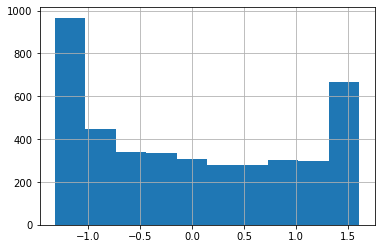

In [54]:
periods = np.reshape(np.array(X_train['ClientPeriod']), (-1, 1))
scaler = StandardScaler()
scaler.fit(periods)
periods = scaler.transform(periods)
X_train['ClientPeriod'] = periods
X_train['ClientPeriod'].hist();

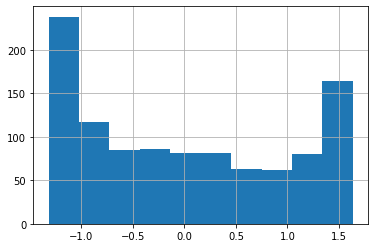

In [55]:
periods = np.reshape(np.array(X_test['ClientPeriod']), (-1, 1))
scaler = StandardScaler()
scaler.fit(periods)
periods = scaler.transform(periods)
X_test['ClientPeriod'] = periods
X_test['ClientPeriod'].hist();

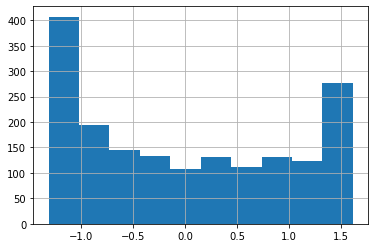

In [56]:
periods = np.reshape(np.array(data_test['ClientPeriod']), (-1, 1))
scaler = StandardScaler()
scaler.fit(periods)
periods = scaler.transform(periods)
data_test['ClientPeriod'] = periods
data_test['ClientPeriod'].hist();

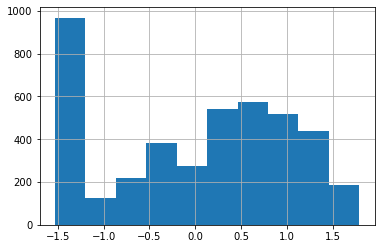

In [57]:
payments = np.reshape(np.array(X_train['MonthlySpending']), (-1, 1))
scaler = StandardScaler()
scaler.fit(payments)
payments = scaler.transform(payments)
X_train['MonthlySpending'] = payments
X_train['MonthlySpending'].hist();

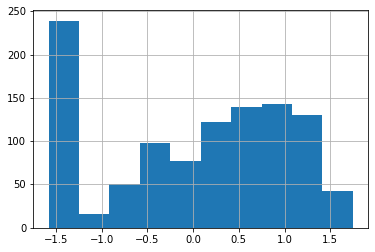

In [58]:
payments = np.reshape(np.array(X_test['MonthlySpending']), (-1, 1))
scaler = StandardScaler()
scaler.fit(payments)
payments = scaler.transform(payments)
X_test['MonthlySpending'] = payments
X_test['MonthlySpending'].hist();

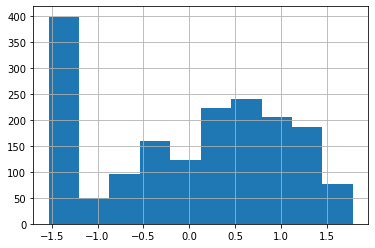

In [59]:
payments = np.reshape(np.array(data_test['MonthlySpending']), (-1, 1))
scaler = StandardScaler()
scaler.fit(payments)
payments = scaler.transform(payments)
data_test['MonthlySpending'] = payments
data_test['MonthlySpending'].hist();

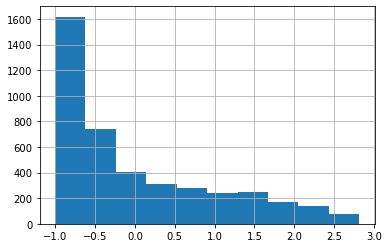

In [60]:
spent = np.reshape(np.array(X_train['TotalSpent']), (-1, 1))
scaler = StandardScaler()
scaler.fit(spent)
spent = scaler.transform(spent)
X_train['TotalSpent'] = spent
X_train['TotalSpent'].hist();

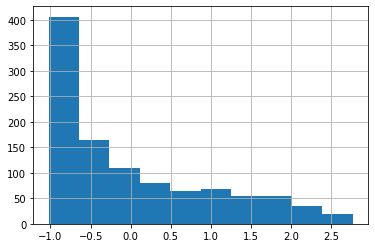

In [61]:
spent = np.reshape(np.array(X_test['TotalSpent']), (-1, 1))
scaler = StandardScaler()
scaler.fit(spent)
spent = scaler.transform(spent)
X_test['TotalSpent'] = spent
X_test['TotalSpent'].hist();

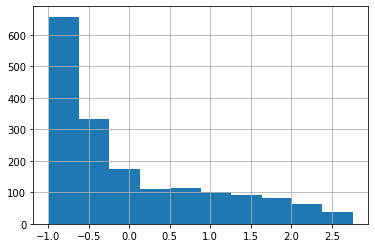

In [62]:
spent = np.reshape(np.array(data_test['TotalSpent']), (-1, 1))
scaler = StandardScaler()
scaler.fit(spent)
spent = scaler.transform(spent)
data_test['TotalSpent'] = spent
data_test['TotalSpent'].hist();

Ищем лучшие параметры для логистической регрессии 

In [ ]:
clf = LogisticRegression()

parametrs = {'C' : [100, 10, 1, 0.1, 0.01, 0.001], 
             'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
             'multi_class' : ['auto', 'ovr', 'multinomial']}

grid = GridSearchCV(clf, parametrs, scoring = 'roc_auc', cv=5);
grid.fit(X_train, y_train);

In [64]:
grid.best_params_

{'C': 100, 'multi_class': 'multinomial', 'solver': 'saga'}

Обучаем модель с полученными параметрами и на тестовой части данных

In [65]:
clf = LogisticRegression(C = 100, multi_class = 'multinomial', solver = 'saga')
clf.fit(X_train, y_train);

C:\Users\Vadim\anaconda3\envs\learn_venv\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Выводим ошибки для тестовой части и валидационной

In [66]:
print(roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

0.8538414732778798
0.8269179265060352


Теперь записываем в файл результат роботы нашей модели на тестовой части 

In [67]:
result = clf.predict_proba(data_test)[:, 1]

In [68]:
Id = [i for i in range(len(result))]

In [69]:
submission = pd.DataFrame({'Id' : Id, 'Churn' : result})

In [70]:
submission.to_csv('./submission.csv', index=False)

Теперь будем работать с градиетным бустингом, а конкретнее catboost

In [72]:
clf = CatBoostClassifier()

parametrs = { 'learning_rate' : [i/100 for i in range(1, 30)], 
             'n_estimators' : [20 + 2 * i for i in range(11)]}

grid = GridSearchCV(clf, parametrs, scoring = 'roc_auc', cv=3);
grid.fit(X_train, y_train);

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 0.6857408	total: 7.86ms	remaining: 149ms
1:	learn: 0.6785501	total: 11.8ms	remaining: 106ms
2:	learn: 0.6703770	total: 50.8ms	remaining: 288ms
3:	learn: 0.6635445	total: 57.4ms	remaining: 230ms
4:	learn: 0.6577776	total: 63.3ms	remaining: 190ms
5:	learn: 0.6511111	total: 69.2ms	remaining: 161ms
6:	learn: 0.6447801	total: 74.8ms	remaining: 139ms
7:	learn: 0.6390537	total: 90.4ms	remaining: 136ms
8:	learn: 0.6321110	total: 94.9ms	remaining: 116ms
9:	learn: 0.6262668	total: 98.4ms	remaining: 98.4ms
10:	learn: 0.6204128	total: 105ms	remaining: 85.7ms
11:	learn: 0.6148170	total: 111ms	remaining: 73.9ms
12:	learn: 0.6093428	total: 118ms	remaining: 63.5ms
13:	learn: 0.6039187	total: 123ms	remaining: 52.7ms
14:	learn: 0.5993542	total: 128ms	remaining: 42.7ms
15:	learn: 0.5939030	total: 132ms	remaining: 33ms
16:	learn: 0.5890224	total: 137ms	remaining: 24.2ms
17:	learn: 0.5842950	total: 142ms	remaining: 15.8ms
18:	learn: 0.5799539	total: 147ms	remaining: 7.73ms
19:	learn: 0.5757495	to

KeyboardInterrupt: 

In [75]:
grid.best_params_

{'learning_rate': 0.05, 'n_estimators': 32}

In [76]:
clf = CatBoostClassifier(n_estimators = 32, learning_rate = 0.05)
clf.fit(X_train, y_train);

0:	learn: 0.6558449	total: 12.3ms	remaining: 383ms
1:	learn: 0.6293586	total: 22.4ms	remaining: 337ms
2:	learn: 0.6002091	total: 33.6ms	remaining: 325ms
3:	learn: 0.5760602	total: 42.9ms	remaining: 300ms
4:	learn: 0.5584563	total: 75.9ms	remaining: 410ms
5:	learn: 0.5404280	total: 107ms	remaining: 465ms
6:	learn: 0.5243350	total: 132ms	remaining: 471ms
7:	learn: 0.5117417	total: 142ms	remaining: 427ms
8:	learn: 0.4983936	total: 152ms	remaining: 388ms
9:	learn: 0.4881388	total: 161ms	remaining: 354ms
10:	learn: 0.4783162	total: 169ms	remaining: 323ms
11:	learn: 0.4705983	total: 178ms	remaining: 297ms
12:	learn: 0.4634274	total: 188ms	remaining: 275ms
13:	learn: 0.4563902	total: 202ms	remaining: 260ms
14:	learn: 0.4504699	total: 211ms	remaining: 239ms
15:	learn: 0.4448843	total: 222ms	remaining: 222ms
16:	learn: 0.4410364	total: 229ms	remaining: 202ms
17:	learn: 0.4393911	total: 234ms	remaining: 182ms
18:	learn: 0.4354682	total: 243ms	remaining: 166ms
19:	learn: 0.4314653	total: 253ms	re

In [77]:
print(roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

0.8683848395791529
0.8286218265438996


In [78]:
result_cb = clf.predict_proba(data_test)[:, 1]

In [79]:
Id_cb = [i for i in range(len(result_cb))]

In [80]:
submission_cb = pd.DataFrame({'Id' : Id_cb, 'Churn' : result_cb})

In [81]:
submission_cb.to_csv('C:\\Users\\Пользователь\\Desktop\\submission_cb.csv', index=False)